# Import and Read Data





### Code Purpose:
This code snippet is designed to import and read CSV file.
It performs the following steps:

1. Imports the necessary library.
2. Reads the data from a local CSV file named 'Your File Name.csv' into a DataFrame.
   - The 'sep' parameter is set to ';' to specify the delimiter used in the CSV file.

Please make sure to have the 'Your File Name.csv' file in the same directory as your notebook or provide the correct file path.


In [2]:
#Import Library
import pandas as pd

# Read the dataframe from a local CSV file
df1 = pd.read_csv('Consumption_of_Building.csv', sep=';')

# Preprocess Data

### Code Purpose:
This code snippet is designed to preprocess a DataFrame containing datetime and value columns. It performs the following steps:
1. Sets the datetime column as the index and converts it to a DatetimeIndex.
2. Excludes specific dates from the DataFrame.
3. Reshapes the DataFrame to extract time and date components.
4. Pivots the DataFrame using the extracted components and stores the result in `df2`.


In [3]:
# Select the datetime column name to format date and time
datetime_column = 'Datetime'  # Replace with the actual column name from your DataFrame

# Check if the datetime column exists in the DataFrame
if datetime_column in df1.columns:
    # Set the datetime column as the index and convert it to a DatetimeIndex
    df1.set_index(datetime_column, inplace=True)
    df1.index = pd.to_datetime(df1.index, format="%d/%m/%Y %H:%M")

    # Delete rows with specific dates
    excluded_dates = [(1, 1), (25, 12)]  # List of (day, month) tuples to exclude
    for day, month in excluded_dates:
        df1 = df1[~((df1.index.day == day) & (df1.index.month == month))]

    # Reshape the DataFrame to extract time and date components
    df1['Time'] = df1.index.time  # Extract the time component
    df1['Day'] = df1.index.date  # Extract the date component

    # Define the column names for pivoting
    day_column = 'Day'  # Replace with the desired column name for the day component
    time_column = 'Time'  # Replace with the desired column name for the time component
    value_column = 'A+_kW'  # Replace with the actual column name from your DataFrame

    # Pivot the DataFrame using the defined column names and stores the result in 'df2'
    df2 = df1.pivot_table(index=day_column, columns=time_column, values=value_column)
else:
    print(f"Column '{datetime_column}' does not exist in the DataFrame.")


### Code Purpose:
This code snippet performs various data operations.

1. Checks in `df2` for NaN values in each row and stores the rows with NaN values in `rows_with_nan`.
2. Fills NaN values using forward filling (`ffill`) along the columns (`axis=1`) and stores the result in `df3`.
3. Converts the index of `df3` to a `DatetimeIndex` using `pd.to_datetime`.
4. Adds a column to `df3` that represents the day of the week based on the index.
5. Identifies the rows in `df3` where all values are zero and stores them in `rows_with_zero`.
6. Counts the number of rows in `rows_with_zero`.
7. Prints the count of rows where all values are zero.

You can customize and adapt this code to fit your specific data analysis requirements.

In [4]:
# Check for NaN values in each row
rows_with_nan = df2[df2.isnull().any(axis=1)]
# fill in NaN value
df3 = df2.fillna(method='ffill', axis=1)
# Convert the index to a DatetimeIndex
df3.index = pd.to_datetime(df3.index)

# Add a column for the day of the week
df3['Day_of_Week'] = df3.index.day_name()
# Find the rows where all values are 0
rows_with_zero = df3.loc[(df3 == 0).all(axis=1)]
# Count the number of weekend rows with zero values
rows_with_zero = len(rows_with_zero)

# Print the count
print("Number of days that all values are 0:", rows_with_zero)

Number of days that all values are 0: 0


### Code Purpose:
This code snippet performs data transformations on a DataFrame (`df3`) to convert the index to a `DatetimeIndex` and add a column representing the day of the week and stores them in `df4`.

These transformations allow for more convenient analysis and manipulation of the data based on the temporal aspects and day of the week.



In [5]:
# Convert the index to a DatetimeIndex
df3.index = pd.to_datetime(df3.index)

# Add a column for the day of the week
df3['Day_of_Week'] = df3.index.day_name()

# Remove the 'Day_of_Week' column
df4 = df3.drop('Day_of_Week', axis=1)

In [6]:
df3.shape

(363, 97)

### Code Purpose:
This code snippet performs data scaling using the StandardScaler from scikit-learn on a DataFrame (`df4`) and stores them in `df_scaled`.


In [7]:
from sklearn.preprocessing import StandardScaler

# Scale the DataFrame using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df4.iloc[:, :])

# Create a new DataFrame with the scaled values
df_scaled = pd.DataFrame(scaled_data, index=df4.index, columns=df4.columns)

# Find the minimum and maximum values in the scaled DataFrame
min_value = df_scaled.min().min()
max_value = df_scaled.max().max()

# Print the minimum and maximum values
print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: -5.730499642769481
Maximum value: 4.630587159984872


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['time']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['time']. An error will be raised in 1.2.
  warnings.warn(


# Recuring Pattern Analysis

## Hierarchical Clustering

### Code Purpose:
1.   Install the necessary library
2.   Import the necessary libraries





In [8]:
!pip install tslearn
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm
from tslearn.metrics import dtw
import numpy as np
import matplotlib.pyplot as plt

### Code Purpose:
This code snippet calculates the distance matrix using Dynamic Time Warping (DTW) on a DataFrame (`df_scaled`). It accomplishes the following tasks:

1. Initializes a distance matrix of zeros with dimensions (`len(df_scaled), len(df_scaled)`).
2. Iterates through each pair of time series in `df_scaled` and calculates the `DTW` distance between them.
3. Stores the `DTW` distances in the corresponding positions of the `distance matrix`.

This distance matrix can be used to measure the similarity or dissimilarity between the time series in `df_scaled` based on their `DTW` distances.



In [9]:
# Calculating distance matrix by using dtw
distance_matrix = np.zeros((len(df_scaled), len(df_scaled)))
for i in tqdm(range(len(df_scaled)), desc="Calculating Distances"):
    for j in range(len(df_scaled)):
        distance_matrix[i, j] = dtw(df_scaled.iloc[i].values, df_scaled.iloc[j].values)

Calculating Distances: 100%|█████████████████████████████████████████████████████████| 363/363 [01:48<00:00,  3.35it/s]


## Dendrogram Analysis

### Code Purpose:

This code snippet performs hierarchical clustering on time series data. It accomplishes the following:

1. Calculates the `linkage matrix` based on the provided `distance matrix` using the single linkage method.
2. Defines a distance `threshold` to create clusters.
Creates clusters using the `fcluster` function based on the distance threshold and the linkage matrix.
3. Finds the closest time series within each cluster by identifying the centroid index with the minimum distance.
4. Calculates the `barycenter` (centroid) of the closest time series within each cluster.
5. Plots the dendrogram with the best closest time series highlighted.
6. The dendrogram represents the hierarchy of clusters based on the linkage matrix.
7. Displays the plot with the dendrogram, highlighted closest time series, and a threshold line.


The code provides insights into the clustering structure of the time series data and visually identifies the most representative time series within each cluster.

C:\Users\User\AppData\Local\Temp\ipykernel_9140\1893287227.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='single')
C:\Users\User\AppData\Local\Temp\ipykernel_9140\1893287227.py:36: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='single')


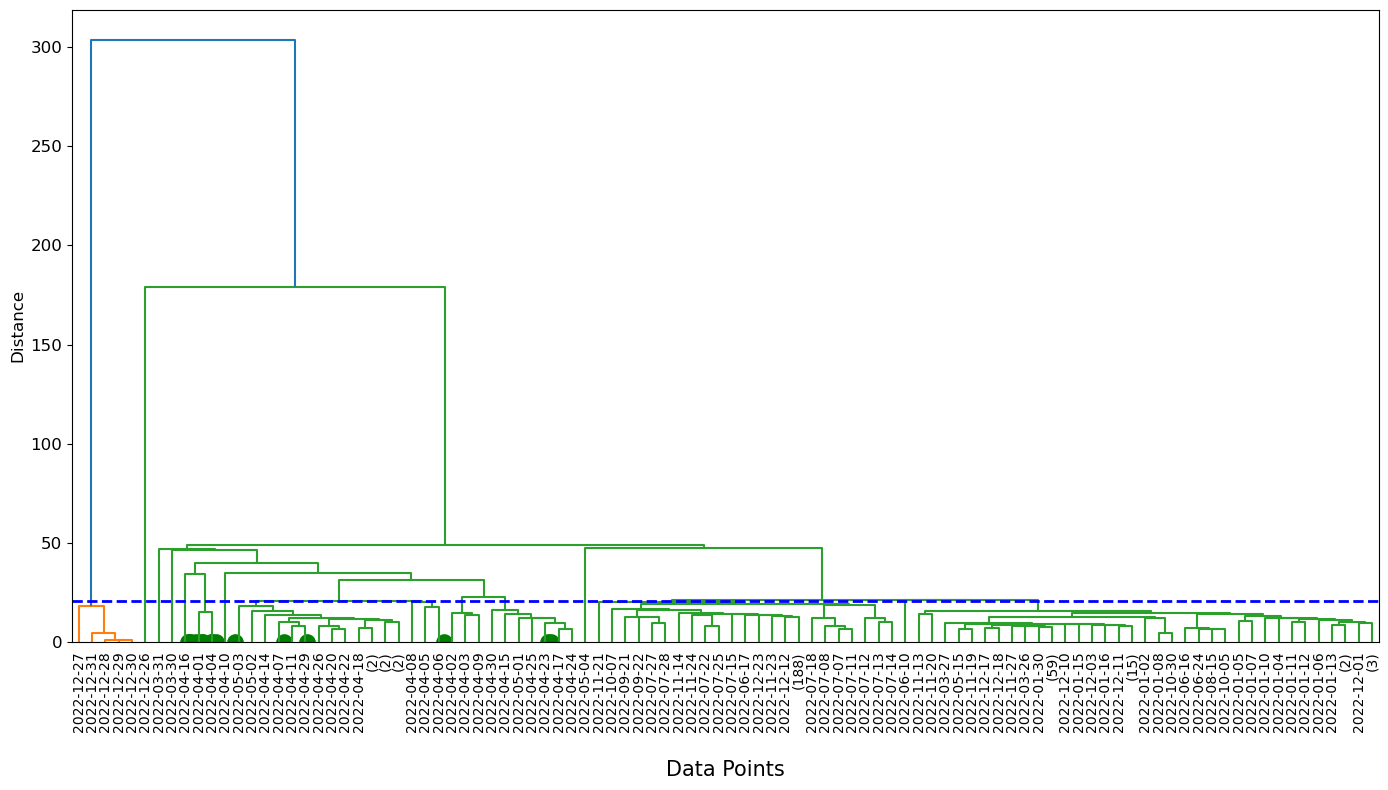

Cluster 11 has 210 data points
Cluster 12 has 110 data points
Cluster 4 has 16 data points
Cluster 7 has 7 data points
Cluster 1 has 5 data points
Sum of lengths of the top clusters: 348
Total number of clusters: 15
Cluster with the most representative data point: 11


In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Calculate the linkage matrix
linkage_matrix = linkage(distance_matrix, method='single')

# Define the distance threshold to create clusters
threshold = 20.5 #Relates with your desired threshold based on visual analysis

# Create clusters based on the distance threshold
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Find the closest time series within each cluster
closest_indices = {}
for cluster_id in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster_id)[0]
    centroid_index = -1
    min_distance = np.inf
    for idx in cluster_indices:
        distance = np.sum(distance_matrix[idx, cluster_indices])
        if distance < min_distance:
            min_distance = distance
            centroid_index = idx
    closest_indices[cluster_id] = centroid_index

# Calculate the barycenter (centroid) of the closest time series within each cluster
barycenters = []
for cluster_id, centroid_index in closest_indices.items():
    centroid_date = df_scaled.index[centroid_index].date()  # Extracting date without timestamp
    cluster_indices = np.where(clusters == cluster_id)[0]
    cluster_dates = [df_scaled.index[idx].date() for idx in cluster_indices]  # Extracting dates without timestamp
    cluster_series = df_scaled.iloc[cluster_indices]
    barycenter = np.mean(cluster_series, axis=0)
    barycenters.append((centroid_date, barycenter))

# Calculate the linkage matrix
linkage_matrix = linkage(distance_matrix, method='single')

# Define the distance threshold to create clusters
threshold = 20.5 #Relace with your desired threshold based on visual analysis

# Create clusters based on the distance threshold
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Find the closest time series within each cluster
closest_indices = {}
for cluster_id in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster_id)[0]
    centroid_index = -1
    min_distance = np.inf
    for idx in cluster_indices:
        distance = np.sum(distance_matrix[idx, cluster_indices])
        if distance < min_distance:
            min_distance = distance
            centroid_index = idx
    closest_indices[cluster_id] = centroid_index

# Calculate the barycenter (centroid) of the closest time series within each cluster
barycenters = []
for cluster_id, centroid_index in closest_indices.items():
    centroid_date = df_scaled.index[centroid_index].date()  # Extracting date without timestamp
    cluster_indices = np.where(clusters == cluster_id)[0]
    cluster_dates = [df_scaled.index[idx].date() for idx in cluster_indices]  # Extracting dates without timestamp
    cluster_series = df_scaled.iloc[cluster_indices]
    barycenter = np.mean(cluster_series, axis=0)
    barycenters.append((centroid_date, barycenter))
# Plot the dendrogram at the specified level with x-axis labels rotated
plt.figure(figsize=(14, 8))
dendrogram(linkage_matrix, labels=[str(d.date()) for d in df_scaled.index], truncate_mode='level', p=15)

# Highlight the best closest time series in each cluster
for cluster_id, centroid_index in closest_indices.items():
    plt.scatter(centroid_index, 0, c='green', linewidth=2, marker='o', s=100)

plt.axhline(y=threshold, color='b', linestyle='--', linewidth=2, label='Threshold')
plt.xlabel('Data Points', fontsize=15, labelpad=20)
plt.ylabel('Distance', fontsize=12)
# plt.title('Dendrogram with Best Closest Time Series Highlighted')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Assign data points to clusters based on the threshold
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Count the number of data points in each cluster
unique_clusters, counts = np.unique(clusters, return_counts=True)

# Sort the counts in descending order
sorted_counts_indices = np.argsort(counts)[::-1]
sorted_counts = counts[sorted_counts_indices]
sorted_clusters = unique_clusters[sorted_counts_indices]

# Print the top clusters with the highest number of data points
num_clusters = min(5, len(sorted_counts))
for i in range(num_clusters):
    print("Cluster {} has {} data points".format(sorted_clusters[i], sorted_counts[i]))

# Calculate and print the sum of lengths of the top clusters
sum_lengths = np.sum(sorted_counts[:num_clusters])
print("Sum of lengths of the top clusters:", sum_lengths)

# Print the total number of clusters
total_clusters = len(unique_clusters)
print("Total number of clusters:", total_clusters)

# Find the cluster with the most representative data point
representative_cluster = unique_clusters[np.argmax(counts)]
print("Cluster with the most representative data point:", representative_cluster)


### Code Purpose:

This code snippet also performs hierarchical clustering on time series data and provides additional analysis. It includes the following steps:

1. Plots the dendrogram at a specified level.
2. Adds a threshold line to the dendrogram plot.
3. Assigns data points to clusters based on the distance threshold using the fcluster function.
4. Counts the number of data points in each cluster and stores the unique clusters and their counts.
5. Sorts the counts in descending order.
6. Prints information about the top clusters with the highest number of data points.
7. Calculates and prints the sum of lengths (counts) of the top clusters.
8. Prints the total number of clusters.
9. Finds the cluster with the most representative data point based on the highest count.

These code snippets facilitate the exploration and analysis of hierarchical clustering results, providing insights into cluster formation and the identification of representative clusters.

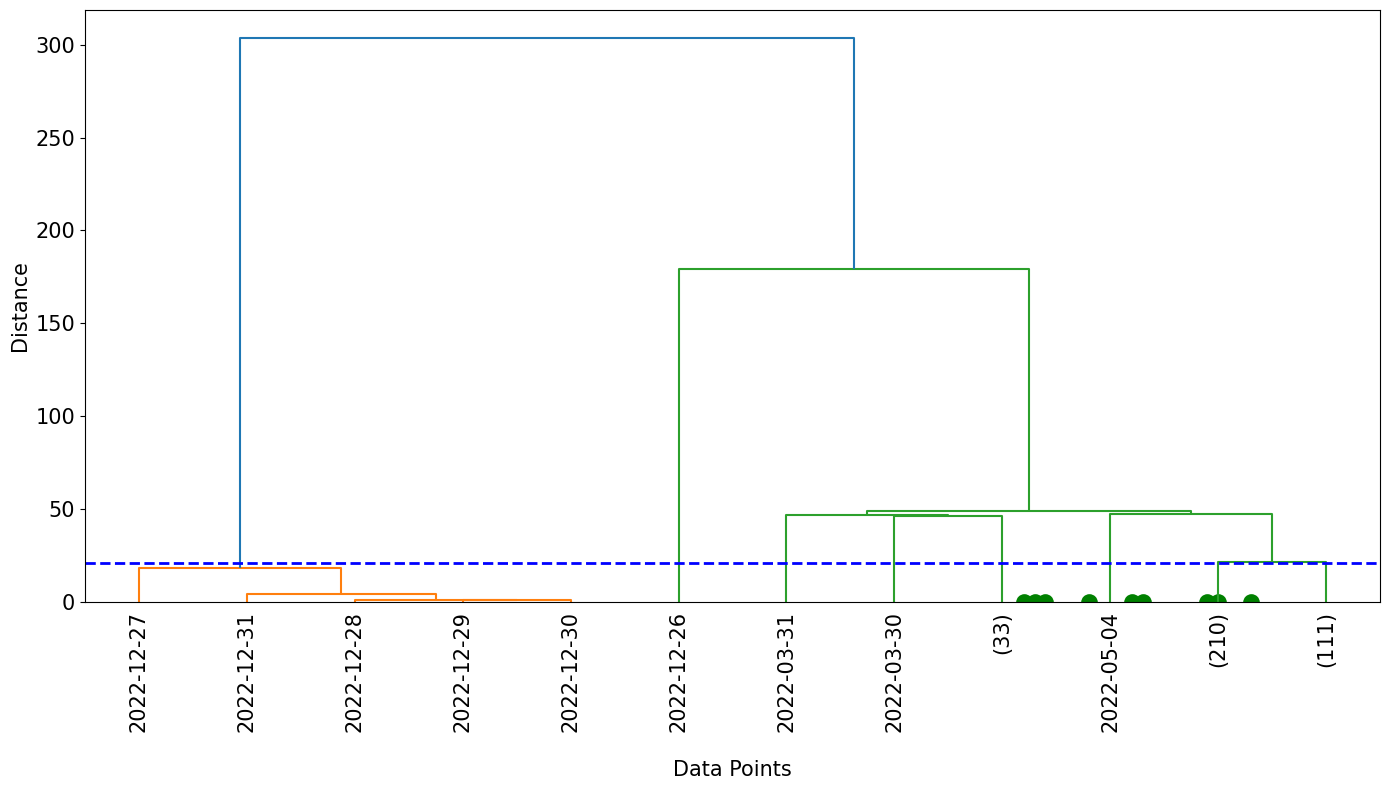

Cluster 11 has 210 data points
Cluster 12 has 110 data points
Cluster 4 has 16 data points
Cluster 7 has 7 data points
Cluster 1 has 5 data points
Sum of lengths of the top clusters: 348
Total number of clusters: 15
Cluster with the most representative data point: 11


In [11]:
# Plot the dendrogram at the specified level with x-axis labels rotated
plt.figure(figsize=(14, 8))
dendrogram(linkage_matrix, labels=[str(d.date()) for d in df_scaled.index], truncate_mode='level', p=4)

# Highlight the best closest time series in each cluster
for cluster_id, centroid_index in closest_indices.items():
    plt.scatter(centroid_index, 0, c='green', linewidth=2, marker='o', s=100)

plt.axhline(y=threshold, color='b', linestyle='--', linewidth=2, label='Threshold')
plt.xlabel('Data Points', fontsize=15, labelpad=20)  # Adjust the space using labelpad)
plt.ylabel('Distance', fontsize=15)

#plt.title('Dendrogram with Best Closest Time Series Highlighted')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

# Assign data points to clusters based on the threshold
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Count the number of data points in each cluster
unique_clusters, counts = np.unique(clusters, return_counts=True)

# Sort the counts in descending order
sorted_counts_indices = np.argsort(counts)[::-1]
sorted_counts = counts[sorted_counts_indices]
sorted_clusters = unique_clusters[sorted_counts_indices]

# Print the top clusters with the highest number of data points
num_clusters = min(5, len(sorted_counts))
for i in range(num_clusters):
    print("Cluster {} has {} data points".format(sorted_clusters[i], sorted_counts[i]))

# Calculate and print the sum of lengths of the top clusters
sum_lengths = np.sum(sorted_counts[:num_clusters])
print("Sum of lengths of the top clusters:", sum_lengths)

# Print the total number of clusters
total_clusters = len(unique_clusters)
print("Total number of clusters:", total_clusters)

# Find the cluster with the most representative data point
representative_cluster = unique_clusters[np.argmax(counts)]
print("Cluster with the most representative data point:", representative_cluster)


### Code Purpose:

The code snippet aims to extract time-series data from the optimal cluster identified in the previous part (11 in this case) to allow for further analysis or visualization.


In [12]:
# Retrieve the indices of data points belonging to the recurring cluster (Cluster 11)
cluster_11_indices = np.where(clusters == 11)[0]

# Extract the time-series data corresponding to the recurring cluster
time_series_cluster_11 = df_scaled.iloc[cluster_11_indices]

# Retrieve the shape of the extracted time-series data
cluster_11_shape = time_series_cluster_11.values.shape

# Print the shape of the time-series data from Cluster 11
print("Shape of Time-series Data from recurring Cluster:", cluster_11_shape)

Shape of Time-series Data from recurring Cluster: (210, 96)


## Box Plot Analysis

### Code Purpose:

Filter the DataFrame based on the recurring Cluster (in this case is Cluster 11) and plot box plots for the time series within that cluster.

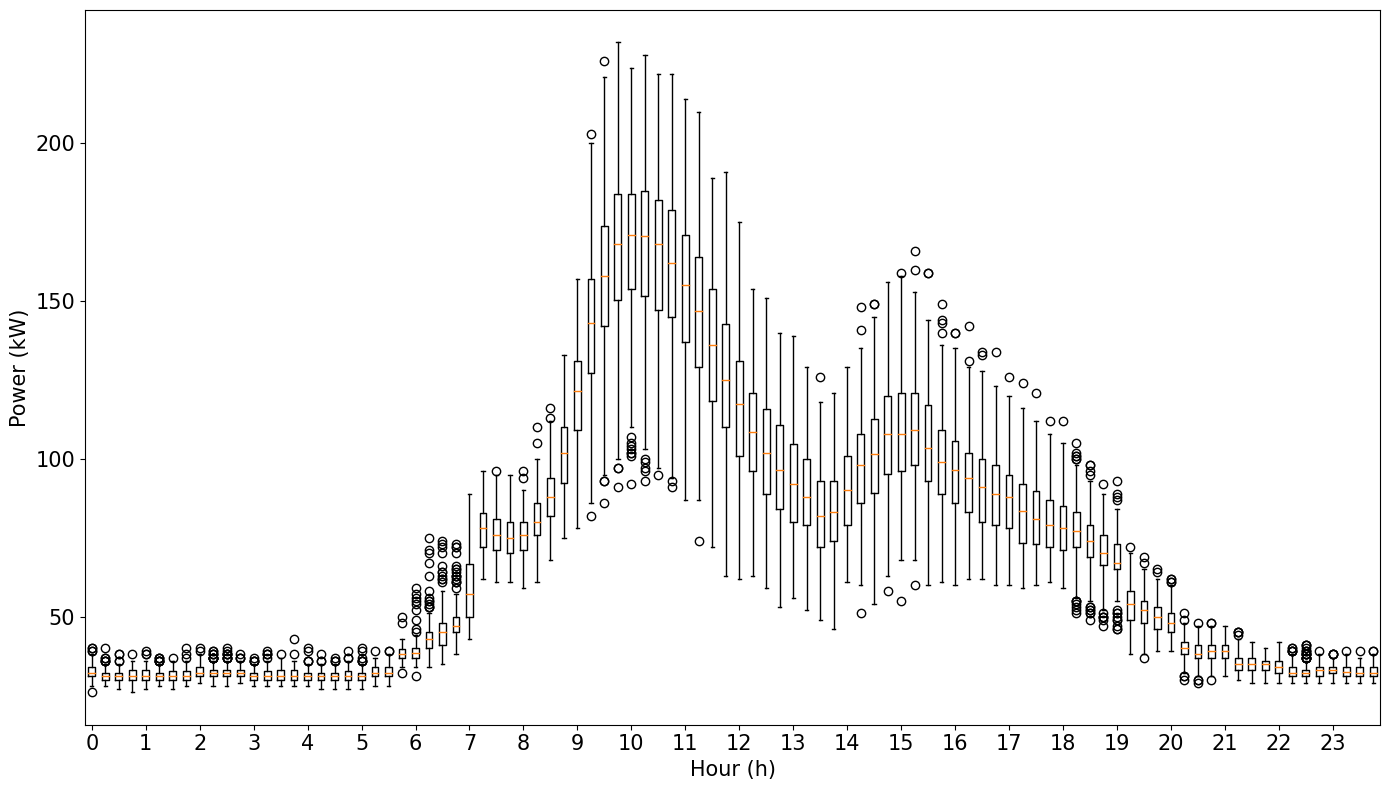

In [13]:
# Assign cluster labels to each row in the DataFrame
df4['Cluster'] = clusters

# Filter the DataFrame for the time series in the Optimal Cluster (Cluster 11)
target_data = df4[df4['Cluster'] == 11].drop('Cluster', axis=1)

# Define positions for the box plots
positions = np.arange(len(target_data.columns)) + 1

# Filter every 4th position for hourly intervals
hourly_positions = positions[::4]
hourly_labels = list(range(24))  # Creating hourly labels from 0 to 23

# Plot the box plots for the filtered time series
plt.figure(figsize=(14, 8))
plt.boxplot(target_data.values, positions=positions)
plt.xticks(hourly_positions, hourly_labels)
plt.xlabel('Hour (h)', fontsize=15)
plt.ylabel('Power (kW)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('Box Plot of Time Series in Optimal Cluster')
plt.tight_layout()
plt.show()


### Code Purpose:
Calculates the max value of the box plot from `target_data.value` which is sorted in `max_boxplotvalue` and prints it to find Peak Power from the maximum load.

In [14]:
# Calculate the maximum value from the box plot
max_boxplotvalue = np.max(target_data.values)

# Print the maximum value from the box plot
print("Maximum value:", max_boxplotvalue)

Maximum value: 232.0


## Recurring Pattern Analysis

### Code Purpose:

This code is to calculate and visualize the median pattern of the time series data in hours to find load within the Optimal Cluster.

This code identified: Base Power and peak Power.



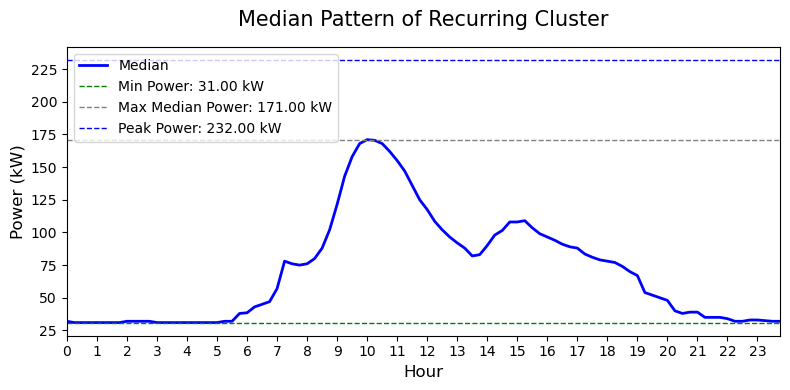

In [15]:
# Calculate the median values of the time series data in the Optimal Cluster
median_values = np.median(target_data.values, axis=0)

# Calculate the min power load (minimum value from median)
Min_power = np.min(median_values)

# Calculate the peak power load (maximum value from median)
Max_median_power = np.max(median_values)

# Calculate the peak power load (maximum value from box plot)
Max_power = np.max(target_data.values)  # Assuming this is what max_boxplotvalue meant

# Create the x-axis values (96 observations)
x = np.arange(96)

# Set the size of the image
plt.figure(figsize=(8, 4))

# Plot the median values in blue
plt.plot(x / 4, median_values, color='blue', linewidth=2, label='Median')

# Plot the min power load as a horizontal line
plt.axhline(y=Min_power, color='green', linestyle='--', linewidth=1, label=f'Min Power: {Min_power:.2f} kW')

# Plot the max median power load as a horizontal line
plt.axhline(y=Max_median_power, color='grey', linestyle='--', linewidth=1, label=f'Max Median Power: {Max_median_power:.2f} kW')

# Plot the peak power load of box plot as a horizontal line
plt.axhline(y=Max_power, color='blue', linestyle='--', linewidth=1, label=f'Peak Power: {Max_power:.2f} kW')

# Set the x-axis tick labels
plt.xticks(np.arange(0, 24))
plt.margins(x=0)

# Set the plot title and labels
plt.title('Median Pattern of Recurring Cluster', fontsize=15, pad=15)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Power (kW)', fontsize=12)

# Add a legend
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


### Code Purpose:

The purpose of this code is to provide an estimate of the total energy demanded by the load based on the load power values at specific hours.

By filtering and summing the load power values, it enables the analysis of energy consumption patterns and helps in understanding the overall energy demand.

In [16]:
# Print the load power values in hours
load= np.round(median_values[(x % 4) == 0], decimals=2).tolist()

total_energy_demanded = sum(load)
print("Total Energy Demanded by the Load:", total_energy_demanded, 'kWh')
print("Max Power Demanded by the Load:", max_boxplotvalue, 'kW')

Total Energy Demanded by the Load: 1698.0 kWh
Max Power Demanded by the Load: 232.0 kW


# Optimization Model

### Code Purpose:
The provided code snippet aims to define the peak and base of energy and power demanded by the load.

In [17]:
# Define max and min of energy and power demanded by load
# Define original battery size
Max_energy=250*2 #Put here "max_boxplotvalue*2" It attempts a C-Rate of 0.5 Max_Power/2 first as an example. But it will be changed according to the knee type chart analysis. The value to be chosen is the point of the curve i which there is no more marginal gains in the % in which the battery supplies the load
Max_power=250 #Put here "max_boxplotvalue*(1-Load Factor)". We have round it to 250 kW instead of 232 kW not to consider 100% load factor, in this case its about 8% of slack which corresponds at the peak to a 92% load factor. The user should consider its own

print("Load Power Median Value in each Hours of a day:", (load))

print("Max Power of load: {:.2f} kW".format(Max_power))
print("Min Power of load: {:.2f} kW".format(Min_power))


Load Power Median Value in each Hours of a day: [32.0, 31.0, 32.0, 31.0, 31.0, 31.0, 38.5, 57.0, 76.0, 121.5, 171.0, 155.0, 117.5, 92.0, 90.0, 108.0, 96.5, 88.0, 78.0, 67.0, 48.0, 39.0, 34.0, 33.0]
Max Power of load: 250.00 kW
Min Power of load: 31.00 kW


### Code Purpose:
The provided code snippet aims to solve the optimization problem for battery usage based on power input and output, energy in and out, state of charge (SOC), and charge/discharge decisions. It performs the following tasks:

1. Sets up the problem as a maximization problem to find optimal solution using LpMaximize.
2. Defines the decision variables, including `power_in`, `power_out`, `energy_in`, `energy_out`, `SOC`, and `charge_discharge`.
3. Defines the objective function to maximize the total energy input (energy_in) to the battery.
4. Adds constraints for the SOC calculations, power limits, energy limits, and charge/discharge decisions.
5. Adds constraints to limit the power output (power_out) based on the load demand (load).
6. Adds constraints to ensure the SOC is zero at the beginning and end of the day.
7. Solves the optimization problem using problem.solve().
8. Prints the status and optimal solution, including the power input, power output, and SOC for each hour.
9. Plots the load profile, power input to the battery, power output from the battery, SOC of the battery, and the power difference between input and output.

The aim of this code is to optimize the battery usage by maximizing the energy input based on the given constraints.
It provides insights into the optimal power input and output, SOC, and their variations throughout the day.

The code also visualizes the load profile and the battery's performance.

C:\Users\User\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Status: Optimal
Optimal Solution:
Hour 0: Power Input = 0.00 kW, Power Output = 0.00 kW, SOC = 0.00 kWh
Hour 1: Power Input = 250.00 kW, Power Output = 0.00 kW, SOC = 250.00 kWh
Hour 2: Power Input = 0.00 kW, Power Output = 32.00 kW, SOC = 218.00 kWh
Hour 3: Power Input = 0.00 kW, Power Output = 31.00 kW, SOC = 187.00 kWh
Hour 4: Power Input = 0.00 kW, Power Output = 31.00 kW, SOC = 156.00 kWh
Hour 5: Power Input = 166.50 kW, Power Output = 0.00 kW, SOC = 322.50 kWh
Hour 6: Power Input = 0.00 kW, Power Output = 38.50 kW, SOC = 284.00 kWh
Hour 7: Power Input = 0.00 kW, Power Output = 57.00 kW, SOC = 227.00 kWh
Hour 8: Power Input = 250.00 kW, Power Output = 0.00 kW, SOC = 477.00 kWh
Hour 9: Power Input = 0.00 kW, Power Output = 121.50 kW, SOC = 355.50 kWh
Hour 10: Power Input = 0.00 kW, Power Output = 171.00 kW, SOC = 184.50 kWh
Hour 11: Power Input = 0.00 kW, Power Output = 155.00 kW, SOC = 29.50 kWh
Hour 12: Power Input = 250.00 kW, Power Output = 0.00 kW, SOC = 279.50 kWh
Hour 13: Po

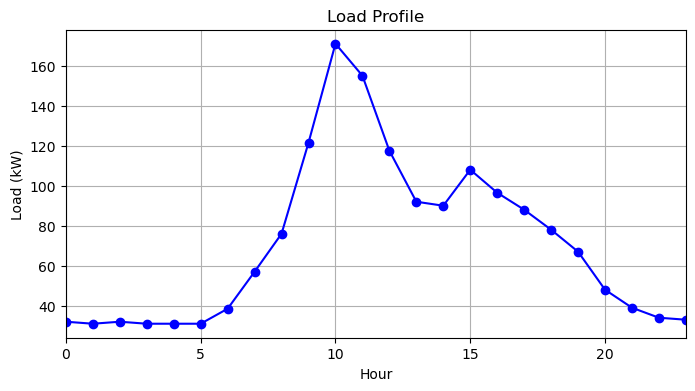

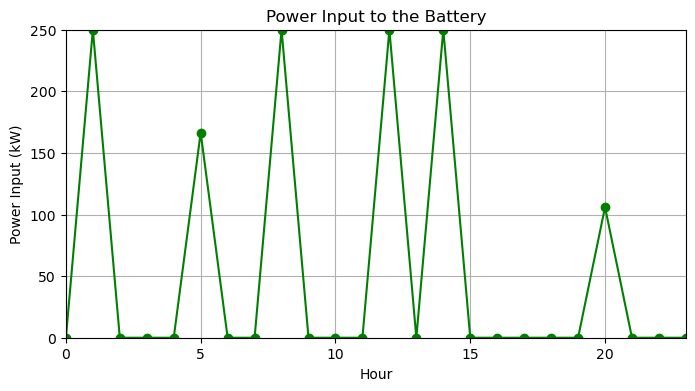

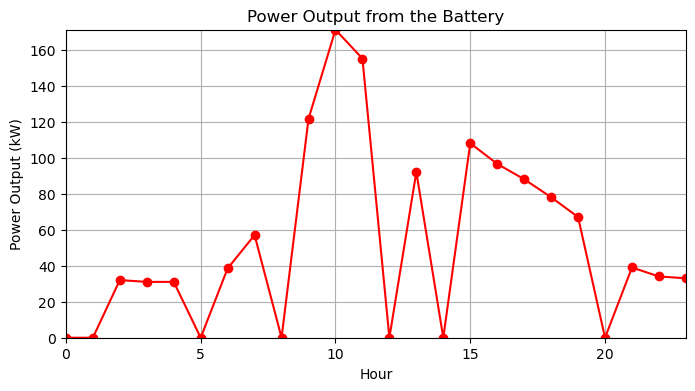

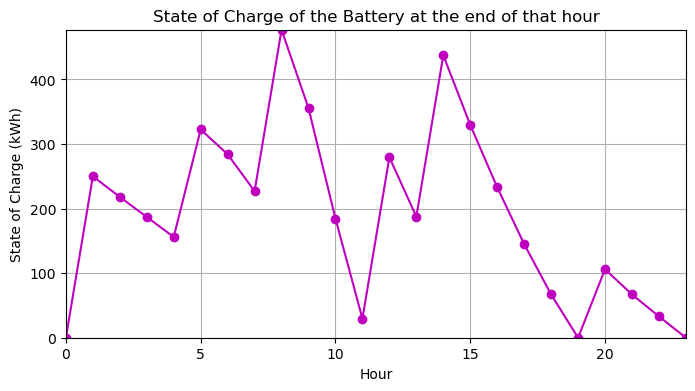

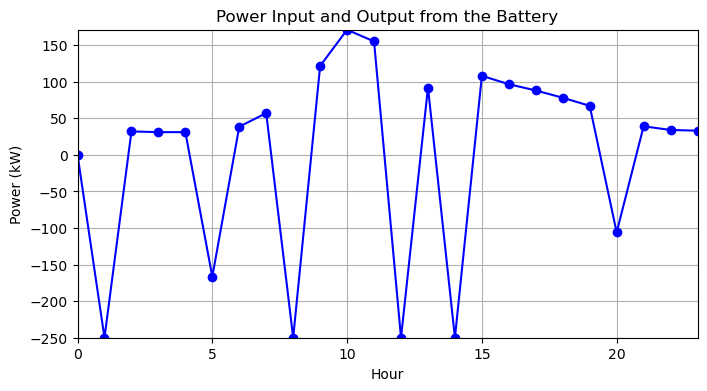

In [18]:
!pip install pulp
from pulp import *

# Problem Statement
problem = LpProblem("Battery Optimization", LpMaximize)

# Define variables
hours = range(24)  # 24 hours in a day
power_in = LpVariable.dicts("Power_in", hours, lowBound=0, upBound=Max_power)  # Power input to the battery in each hour
power_out = LpVariable.dicts("Power_out", hours, lowBound=0, upBound=Max_power)  # Power output from the battery in each hour
energy_in = LpVariable.dicts("Energy_in", hours, lowBound=0, upBound=Max_energy)  # Energy charged by the battery in each hour
energy_out = LpVariable.dicts("Energy_out", hours, lowBound=0, upBound=Max_energy)  # Energy discharged by the battery in each hour
soc = LpVariable.dicts("SOC", hours, lowBound=0, upBound=Max_energy)  # State of charge of the battery at the end of each hour
charge_discharge = LpVariable.dicts("Charge_Discharge", hours, cat='Binary')  # Binary variable representing charging or discharging


# Objective function
problem += lpSum(energy_in[hour] for hour in hours)


# Constraints
for hour in hours:
    if hour == 0:
        problem += soc[hour] == energy_in[hour] - energy_out[hour]
    else:
        problem += soc[hour] == soc[hour-1] + energy_in[hour] - energy_out[hour]

    problem += power_in[hour] == energy_in[hour]
    problem += power_out[hour] == energy_out[hour]

    problem += power_in[hour] <= Max_energy
    problem += power_out[hour] <= Max_energy

    problem += energy_in[hour] <= Max_energy
    problem += energy_out[hour] <= Max_energy

    problem += energy_in[hour] <= charge_discharge[hour] * Max_energy
    problem += energy_out[hour] <= (1 - charge_discharge[hour]) * Max_energy
    
# Add load constraints
for hour in hours:
    problem += power_out[hour] <= load[hour]

# Add constraint for SOC to be zero at the beginning and end of the day
problem += soc[0] == 0
problem += soc[23] == 0

# Solve the problem
problem.solve()

# Print the result
print("Status:", LpStatus[problem.status])
print("Optimal Solution:")
for hour in hours:
    print(f"Hour {hour}: Power Input = {power_in[hour].varValue:.2f} kW, Power Output = {power_out[hour].varValue:.2f} kW, SOC = {soc[hour].varValue:.2f} kWh")

# Plot load profile
plt.figure(figsize=(8, 4))
plt.plot(hours, load, marker='o', linestyle='-', color='b')
plt.margins(x=0)
plt.xlabel('Hour')
plt.ylabel('Load (kW)')
plt.title('Load Profile')
plt.grid(True)
plt.show()

# Plot power input to the battery
power_in_values = [power_in[hour].varValue for hour in hours]
plt.figure(figsize=(8, 4))
plt.plot(hours, power_in_values, marker='o', linestyle='-', color='g')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel('Hour')
plt.ylabel('Power Input (kW)')
plt.title('Power Input to the Battery')
plt.grid(True)
plt.show()

# Plot power output from the battery
power_out_values = [power_out[hour].varValue for hour in hours]
plt.figure(figsize=(8, 4))
plt.plot(hours, power_out_values, marker='o', linestyle='-', color='r')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel('Hour')
plt.ylabel('Power Output (kW)')
plt.title('Power Output from the Battery')
plt.grid(True)
plt.show()

# Plot state of charge (SOC) of the battery
soc_values = [soc[hour].varValue for hour in hours]
plt.figure(figsize=(8, 4))
plt.plot(hours, soc_values, marker='o', linestyle='-', color='m')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel('Hour')
plt.ylabel('State of Charge (kWh)')
plt.title('State of Charge of the Battery at the end of that hour')
plt.grid(True)
plt.show()

power_difference = [-power_in[hour].varValue + power_out[hour].varValue for hour in hours]
plt.figure(figsize=(8, 4))
plt.plot(hours, power_difference, marker='o', linestyle='-', color='b')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel('Hour')
plt.ylabel('Power (kW)')
plt.title('Power Input and Output from the Battery')
plt.grid(True)
plt.show()



In [19]:
total_energy_provided = 0
for hour in hours:
     total_energy_provided += power_out[hour].varValue
print("Total Energy Provided to the Load by the battery:", total_energy_provided, 'kWh')
total_energy_demanded = sum(load)  # Calculate the total energy demanded by the load
print("Total Energy Demanded by the Load:", total_energy_demanded, 'kWh')
print("Percentage of energy supplied by the battery:", total_energy_provided/total_energy_demanded*100, '%')
# Signal output for Hybridization model:
signal = []
for a, b in zip(power_in_values, power_out_values):
    signal.append(a*(-1) + b)

print("The signal to the Hybridization model is:", signal)

Total Energy Provided to the Load by the battery: 1272.5 kWh
Total Energy Demanded by the Load: 1698.0 kWh
Percentage of energy supplied by the battery: 74.94110718492344 %
The signal to the Hybridization model is: [0.0, -250.0, 32.0, 31.0, 31.0, -166.5, 38.5, 57.0, -250.0, 121.5, 171.0, 155.0, -250.0, 92.0, -250.0, 108.0, 96.5, 88.0, 78.0, 67.0, -106.0, 39.0, 34.0, 33.0]


# What Energy capacity to choose? - Knee chart analysis

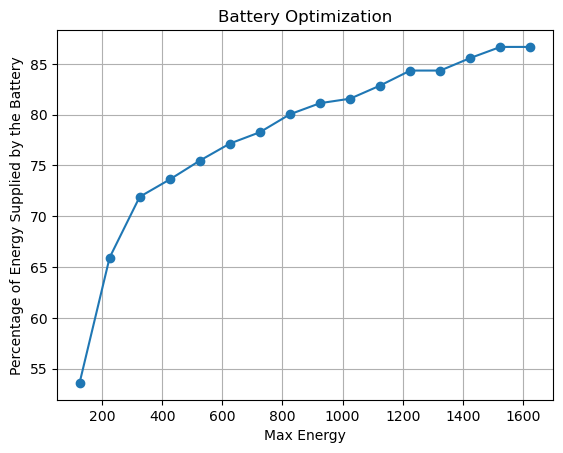

In [20]:
# We try several Energy capacities and find out which delivers the most to the load. Define the range for Max_energy
min_energy = 125
max_energy = 1700
step_energy = 100

# Lists to store the values
max_energy_values = []
percentage_values = []

# Loop through different values of Max_energy
for energy in range(min_energy, max_energy + 1, step_energy):
    # Problem Statement
    problem = LpProblem("Battery Optimization", LpMaximize)
    # Set the value for Max_energy
    Max_energy = energy

    Max_Power=Max_power

    # Problem Statement
    problem = LpProblem("Battery Optimization", LpMaximize)

    # Define variables
    hours = range(24)  # 24 hours in a day
    power_in = LpVariable.dicts("Power_in", hours, lowBound=0, upBound=Max_Power)  # Power input to the battery in each hour
    power_out = LpVariable.dicts("Power_out", hours, lowBound=0, upBound=Max_Power)  # Power output from the battery in each hour
    energy_in = LpVariable.dicts("Energy_in", hours, lowBound=0, upBound=Max_energy)  # Energy charged by the battery in each hour
    energy_out = LpVariable.dicts("Energy_out", hours, lowBound=0, upBound=Max_energy)  # Energy discharged by the battery in each hour
    soc = LpVariable.dicts("SOC", hours, lowBound=0, upBound=Max_energy)  # State of charge of the battery at the end of each hour
    charge_discharge = LpVariable.dicts("Charge_Discharge", hours, cat='Binary')  # Binary variable representing charging or discharging

    # Objective function
    problem += lpSum(energy_in[hour] for hour in hours)  # Maximize the sum of energy input

    # Constraints
    for hour in hours:
        if hour == 0:
            problem += soc[hour] == energy_in[hour] - energy_out[hour]
        else:
            problem += soc[hour] == soc[hour-1] + energy_in[hour] - energy_out[hour]

        problem += power_in[hour] == energy_in[hour]
        problem += power_out[hour] == energy_out[hour]

        problem += power_in[hour] <= Max_energy
        problem += power_out[hour] <= Max_energy

        problem += energy_in[hour] <= Max_energy
        problem += energy_out[hour] <= Max_energy

        problem += energy_in[hour] <= charge_discharge[hour] * Max_energy
        problem += energy_out[hour] <= (1 - charge_discharge[hour]) * Max_energy

    # Add load constraints
    for hour in hours:
        problem += power_out[hour] <= load[hour]  # Power output cannot exceed the load demand

    # Add constraint for SOC to be zero at the beginning of the day
    problem += soc[0] == 0
    problem += soc[23] == 0


        # Solve the problem
    problem.solve()

    total_energy_provided = 0
    for hour in hours:
        total_energy_provided += power_out[hour].varValue

    max_energy_values.append(Max_energy)
    percentage_values.append(total_energy_provided/sum(load)*100)

# Plot the values
plt.plot(max_energy_values, percentage_values, marker='o')
plt.xlabel("Max Energy")
plt.ylabel("Percentage of Energy Supplied by the Battery")
plt.title("Battery Optimization")
plt.grid(True)
plt.show()


At this point, by looking at the chart you should pick the knee value, which is the one on the curve that evidenciates that no marginal gains exist in % of supply to the load by increasing the capacity. In the original example file we choose 75%, which corresponds to 75% independence from the grid and to 500 kWh of capacity. This new value should be updated in the variable "Max_energy" in the beginning of the "Optimization Model" chapter above.

# Hybridization Model

Code Purpose: The provided code snippet aims at providing a hybridization curve and area based on a battery dispatch provided by a CSV file coming from Block 2. In case the user has its own battery dispatch it can skip the previous steps and run this one. It performs the following tasks:

1- Sets up the CSV file from Block
2- Establishes several CutOff values to generate points for the hybridization curve. 
3- Generates a hybridization area and provides an estimation of that space as a metric called H 
4 - It plot the original dispatch purple line and the hybrid curve. 
5 - It provides two examples, one is a viable optimal solution and another is not. Only applicable to the original example data

In [21]:
#Preparing the data. the previous block considers the SOC at the end of each hour, whereas the third block considers the SOC
#at the beginning of the hour. For this reason a shift of 1 hour has to be made, regressing block 2, one hour. 
signal1=signal[1:]
signal1=signal1+ [0] 
import csv

# Your list of data (example data)
data = [["Time", "P(kW)", "E(kWh)", "P1", "P2", "E1", "E2"]]


signal1 = [value * -1 for value in signal1]
signal1[0] = f"{signal1[0]},0,0,0,0,0"
for i, value in enumerate(signal1, start=1):
    value_str = str(value)

    # Add the text
    if i < len(signal1) and i>1:
        value_str += ","
    
    data.append([i, value_str])

csv_file_name = "signal_v1.csv"

with open(csv_file_name, mode="w", newline="") as file:
    writer = csv.writer(file)

    # Write the data
    for row in data:
        writer.writerow(row)

# Input and output file names
input_file_name = "signal_v1.csv"
output_file_name = "signal_v3.csv"

with open(input_file_name, mode="r", newline="") as input_file, open(output_file_name, mode="w", newline="") as output_file:
    for line in input_file:
        # Remove double quotes and write the line to the output file
        modified_line = line.replace('"', '')
        output_file.write(modified_line)

print(f"The file format has been prepared for hybridization and data has been written to {output_file_name}")

The file format has been prepared for hybridization and data has been written to signal_v3.csv


In [22]:
# The hibridization Algorithm starts
# region Imported Libraries
import matplotlib.pyplot as plt  # For plotting the hybridization curve
import pandas as pd  # To organize, process the data
from IPython.display import display  # To present the dataframes

# endregion

# region Structures


# Calculates area under the Hybridization curve
def calculate_area_under_curve(coordinates_list):
    n = len(coordinates_list)
    area = 0.0

    for i in range(1, n):
        x1, y1 = coordinates_list[i - 1]
        x2, y2 = coordinates_list[i]
        height = (y1 + y2) / 2.0  # Average height of the trapezoid
        width = x2 - x1  # Width of the base of the trapezoid
        area += width * height

    return area


# Define a function to set values in 'P1' column based on condition
def set_p1(row, cutoff):

    max_p = df['P(kW)'].abs().max()  # Gets the maximum absolute value of power relative to each cutoff

    if row['P(kW)'] >= 0:  # Ignores first row where values are zero

        if row['P(kW)'] < max_p * cutoff:  # Checks if the value is smaller than the cutoff threshold

            return row['P(kW)']  # returns the power value at that row

        else:

            return max_p * cutoff  # If greater, then it returns the maximum allowed power for the cutoff

    else:  # Analogous to the above code but for the negative values of power

        if abs(row['P(kW)']) < max_p * cutoff:

            return row['P(kW)']

        else:

            return max_p * cutoff * -1


# Define a function to set values in 'P2' column based on condition
def set_p2(row):

    return row['P(kW)'] - row['P1']  # The power for the second battery is always the overall minus the first battery


# Define a function to set values in 'E2' column based on condition
def set_e2(row):

    return row['E(kWh)'] - row['E1']  # The energy for the second battery is always the overall minus the first battery

# endregion

# region Signal Import


# Read data from CSV and fill the DataFrame
data = pd.read_csv('signal_v3.csv')

# Assigns the data to the DataFrame
df = pd.DataFrame(data)

# Extracts the overall minimum and absolut maximum values for 'P (kW)'
min_power = df['P(kW)'].min()
max_power = df['P(kW)'].abs().max()

# endregion

# region Calculate E(kWh)

# Define E(kWh)
for index, row in df.iterrows():  # Iterates along the dataframe do calculate the E(kWh) values for each t

    if int(str(index)) - 1 >= 0:  # Ignores the first row

        previous_E = df.iloc[int(str(index)) - 1]["E(kWh)"]  # Retrieves the t-1 energy value
        previous_P = df.iloc[int(str(index)) - 1]["P(kW)"]  # Retrieves the t-1 power value
        df.at[index, "E(kWh)"] = previous_E + previous_P  # Calculates the t energy value

# Extract the minimum and maximum values for 'E (kWh)'
min_energy = df['E(kWh)'].min()
max_energy = df['E(kWh)'].abs().max()

# endregion

# region Hybridization

# Define an empty list to store the coordinates
coordinates_list_0 = []  # Creates a list for both signals
coordinates_list_1 = []  # Creates a list for signal P1/E1
coordinates_list_2 = []  # Creates a list for signal P2/E2

iter_aux = 0  # This variable is used to iterate all the cutoff values from 0% to 100%

while iter_aux <= 100:  # This cycle is for calculating the different cutoff values

    # Apply the function to set values in 'PB' column
    df['P1'] = df.apply(set_p1, axis=1, args=(iter_aux / 100,))  # calls function set_p1 to fill P1 column in df
    df['P2'] = df.apply(set_p2, axis=1)  # calls function set_p2 to fill P2 column in df

    for index, row in df.iterrows():  # This loop is used to calculate the values for E1 and E2 columns

        if int(str(index)) > 0:  # Ignores first row of dataframe

            previous_E1 = df.iloc[int(str(index)) - 1]["E1"]  # Retrieves t-1 value of E1 (energy)
            previous_P1 = df.iloc[int(str(index)) - 1]["P1"]  # Retrieves t-1 value of P1 (power)

            if previous_E1 + previous_P1 >= 0:  # Checks if there is enough energy stored in E1 for next iteration

                df.at[index, "E1"] = previous_E1 + previous_P1  # Calculates t value of E1 (energy)

            else:

                df.at[index, "E1"] = 0  # If there is not enough energy then E1 at time t is 0 kWh (cannot be <0)

    # Calculates E2 || When (t=x : E1(x) = 0) then the second battery must provide the missing energy for the system
    df['E2'] = df.apply(set_e2, axis=1)  # Calls function set_E2 to fill values of E2 column (energy)

    # Extracts xx coordinates of Signal 1 for each cut-off
    curve_point_xx_P1 = df['P1'].abs().max()  # extracts the maximum value of P1
    index_of_max_P = df['P1'].abs().idxmax()  # extracts the dataframe index position of maximum value of P1

    # Extracts yy coordinates of Signal 1 for each cut-off
    curve_point_yy_E1 = df['E1'].max()  # extracts the maximum value of E1
    index_of_max_E = df['E1'].idxmax()  # extracts the dataframe index position of maximum value of E1

    # Extracts yy coordinates of Signal 2 for each cut-off
    # If the max of E1 plus the corresponding value of E2 equals the overall max value of E(kWh)
    if curve_point_yy_E1 + df.iloc[index_of_max_E]['E2'] == df['E(kWh)'].max():

        curve_point_yy_E2 = df.iloc[index_of_max_E]['E2']

    else:

        curve_point_yy_E2 = df['E2'].max()  # If the max value of E2 is not on the same index of max value E1

    # Extracts xx coordinates of Signal 2 for each cut-off
    # If the max of P1 plus the corresponding value of P2 equals the overall max value of P(kW)
    if curve_point_xx_P1 + df.iloc[index_of_max_P]['P2'] == df['P(kW)'].abs().max():

        curve_point_xx_P2 = df.iloc[index_of_max_P]['P2']

    else:

        curve_point_xx_P2 = df['P2'].abs().max()   # If the max value of P2 is not on the same index of max value P1

    # Appends the corresponding coordinates to each of the lists, according to the previous lines of code
    coordinates_list_0.append((curve_point_xx_P1, curve_point_yy_E1, curve_point_xx_P2, curve_point_yy_E2))
    coordinates_list_1.append((curve_point_xx_P1, curve_point_yy_E1))
    coordinates_list_2.append((curve_point_xx_P2, curve_point_yy_E2))

    # Order of increment between iterations
    iter_aux += 1

# Displays the last df calculated, corresponding to 100% cut off, all E2 and P2 values should be equal to 0
display(df)

# endregion

# region Base and Peak Signal Identification

middle_index = int((len(coordinates_list_1) - 1)/2)  # Finds the index of the middle of the lists (cut off +/- 50%)

mid_S1 = coordinates_list_1[middle_index]  # Retrieves the P1 value at the middle of the list (cut off +/- 50%)
mid_S2 = coordinates_list_2[middle_index]  # Retrieves the P2 value at the middle of the list (cut off +/- 50%)

Slope_EsPs = max_energy/max_power  # Calculates slope of original signal
Slope_S1 = mid_S1[1]/mid_S1[0]  # Calculates slope of signal 1 at cut off close to 50%
Slope_S2 = mid_S2[1]/mid_S2[0]  # Calculates slope of signal 2 at cut off close to 50%

# The signal that has a slope greater that the slope of the original signal is the peak signal and the other the base.

print(f"\n(Es, Ps) : {Slope_EsPs} || (E1, P1) : {Slope_S1} || (E2, P2) : {Slope_S2}")

if Slope_S1 > Slope_S2:

    print("\nSignal S1 corresponds to Peak Signal and signal S2 corresponds to Base Signal.\n")
    S1_Peak = 1

else:

    print("\nSignal S2 corresponds to Peak Signal and signal S1 corresponds to Base Signal.\n")
    S1_Peak = 0

# endregion

# region P(signal)/E(signal) Ratio and H value Calculation

Ps_Es_ratio = df["P(kW)"].max()/df["E(kWh)"].max()

Es_area = (1 / 2) * (df["P(kW)"].abs().max() * df["E(kWh)"].max())

if S1_Peak == 0:  # If S1 is base then it uses coordinates_list_1

    Eb_area = calculate_area_under_curve(coordinates_list_1)

else:  # If S1 is peak then it uses coordinates_list_2

    coordinates_list_2.reverse()
    Eb_area = calculate_area_under_curve(coordinates_list_1)
    coordinates_list_2.reverse()

print(f"\nEb_area = {Eb_area} || Es_area = {Es_area}")

# H = (2 * (Eb_area / Es_area) - 1)

H = (Es_area - Eb_area)/Es_area

print(f"\nPs/Es = {Ps_Es_ratio}")

print(f"\nH = {round(H,2)}")

,Time,P(kW),E(kWh),P1,P2,E1,E2
0,1,250.0,0.0,250.0,0.0,0.0,0.0
1,2,-32.0,250.0,-32.0,0.0,250.0,0.0
2,3,-31.0,218.0,-31.0,0.0,218.0,0.0
3,4,-31.0,187.0,-31.0,0.0,187.0,0.0
4,5,166.5,156.0,166.5,0.0,156.0,0.0
5,6,-38.5,322.5,-38.5,0.0,322.5,0.0
6,7,-57.0,284.0,-57.0,0.0,284.0,0.0
7,8,250.0,227.0,250.0,0.0,227.0,0.0
8,9,-121.5,477.0,-121.5,0.0,477.0,0.0
9,10,-171.0,355.5,-171.0,0.0,355.5,0.0



(Es, Ps) : 1.908 || (E1, P1) : 1.484 || (E2, P2) : 2.332

Signal S2 corresponds to Peak Signal and signal S1 corresponds to Base Signal.


Eb_area = 51873.75 || Es_area = 59625.0

Ps/Es = 0.5241090146750524

H = 0.13


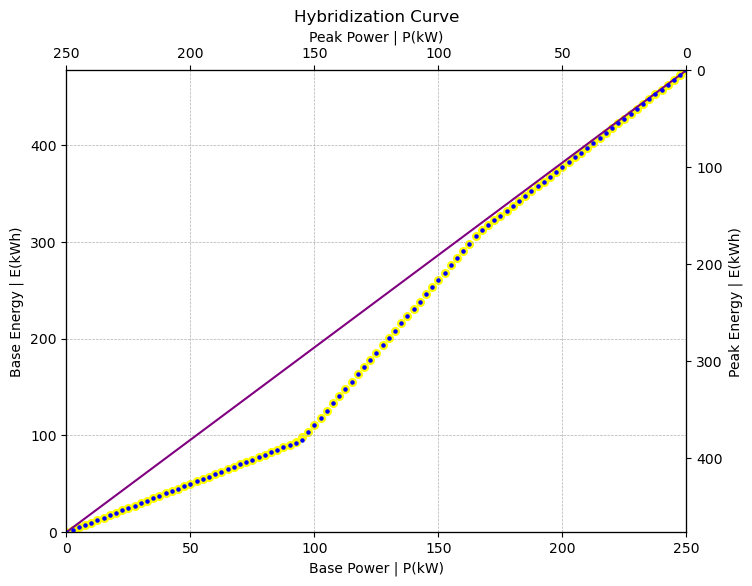

In [23]:
# endregion

# region Plotting

# Set the limits for both coordinate systems
x_min, x_max = 0, df["P(kW)"].abs().max()
y_min, y_max = 0, df["E(kWh)"].abs().max()

# Create the plot and set the limits
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

# Coordinate System 1: Origin in the bottom-left corner
ax1.set_title('Hybridization Curve')
ax1.grid(True, linestyle='--', linewidth=0.5)

# Coordinate System 2: For base values y-axis
ax2 = ax1
ax2.set_ylim(y_min, y_max)
ax2.set_ylabel('Base Energy | E(kWh)')

# Coordinate System 2: For base values x-axis
ax2 = ax1
ax2.set_xlim(x_min, x_max)
ax2.set_xlabel('Base Power | P(kW)')

# Coordinate System 3: For peak values y-axis
ax3 = ax2.twinx()
ax3.set_ylim(y_max, y_min)  # Invert the y-axis for the second coordinate system
ax3.set_ylabel('Peak Energy | E(kWh)')

# Coordinate System 3: For peak values x-axis
ax3 = ax2.twiny()
ax3.set_xlim(x_max, x_min)  # Invert the x-axis for the second coordinate system
ax3.set_xlabel('Peak Power | P(kW)')

# Define vectors in both coordinate systems
vector0 = [df["P(kW)"].abs().max(), df["E(kWh)"].abs().max()]  # Vector in the bottom-left origin

count = 0

for item in coordinates_list_1:

    if (Slope_S1 > Slope_S2) and (Slope_S2 < Slope_EsPs):  # Checks if S1 has greater slope than original signal

        vector1 = [coordinates_list_2[count][0], coordinates_list_2[count][1]]  # Bottom-left origin (Base)
        vector2 = [coordinates_list_1[count][0], coordinates_list_1[count][1]]  # Upper-right origin (Peak)

    elif (Slope_S2 > Slope_S1) and (Slope_S1 < Slope_EsPs):  # Checks if S2 has greater slope than original signal

        vector1 = [coordinates_list_1[count][0], coordinates_list_1[count][1]]  # Bottom-left origin (Base)
        vector2 = [coordinates_list_2[count][0], coordinates_list_2[count][1]]  # Upper-right origin (Peak)

    else:

        vector1 = None
        vector2 = None
        print("\nError || Base or Peak signal poorly constructed.\n")
        exit(0)

    # Plot the vectors in the bottom-left origin as scatter plots
    ax2.scatter(vector1[0], vector1[1], color='yellow', marker='o', s=30)

    # Plot the vectors in the upper-right origin
    ax3.scatter(vector2[0], df["E(kWh)"].abs().max()-vector2[1], color='blue', marker='.', s=20)

    count += 1

# Plot the lines connecting the points
ax2.plot([0, df["P(kW)"].abs().max()], [0, df["E(kWh)"].abs().max()], color='purple')



# An example

Presented next are two Examples, one provides an optimal Hybrid sizing solution displayed as a green star and a non optimal solution in a red cross (This is an example for the original dispatch provided as an example). The first one can clearly be visible as it is cointained Within the area between the hybridization curve and the original signal line. The second one is outside that same area and hence not considered as hybrid optimal solution. If you run your own load, these examples will unlikely be valid.

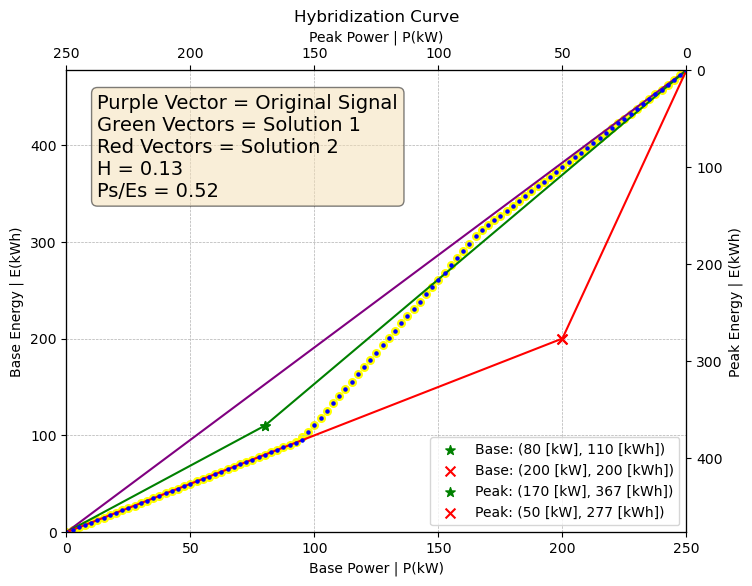

In [24]:
# endregion

# region Plotting

# Set the limits for both coordinate systems
x_min, x_max = 0, df["P(kW)"].abs().max()
y_min, y_max = 0, df["E(kWh)"].abs().max()

# Create the plot and set the limits
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

# Coordinate System 1: Origin in the bottom-left corner
ax1.set_title('Hybridization Curve')
ax1.grid(True, linestyle='--', linewidth=0.5)

# Coordinate System 2: For base values y-axis
ax2 = ax1
ax2.set_ylim(y_min, y_max)
ax2.set_ylabel('Base Energy | E(kWh)')

# Coordinate System 2: For base values x-axis
ax2 = ax1
ax2.set_xlim(x_min, x_max)
ax2.set_xlabel('Base Power | P(kW)')

# Coordinate System 3: For peak values y-axis
ax3 = ax2.twinx()
ax3.set_ylim(y_max, y_min)  # Invert the y-axis for the second coordinate system
ax3.set_ylabel('Peak Energy | E(kWh)')

# Coordinate System 3: For peak values x-axis
ax3 = ax2.twiny()
ax3.set_xlim(x_max, x_min)  # Invert the x-axis for the second coordinate system
ax3.set_xlabel('Peak Power | P(kW)')

# Define vectors in both coordinate systems
vector0 = [df["P(kW)"].abs().max(), df["E(kWh)"].abs().max()]  # Vector in the bottom-left origin

count = 0

for item in coordinates_list_1:

    if (Slope_S1 > Slope_S2) and (Slope_S2 < Slope_EsPs):  # Checks if S1 has greater slope than original signal

        vector1 = [coordinates_list_2[count][0], coordinates_list_2[count][1]]  # Bottom-left origin (Base)
        vector2 = [coordinates_list_1[count][0], coordinates_list_1[count][1]]  # Upper-right origin (Peak)

    elif (Slope_S2 > Slope_S1) and (Slope_S1 < Slope_EsPs):  # Checks if S2 has greater slope than original signal

        vector1 = [coordinates_list_1[count][0], coordinates_list_1[count][1]]  # Bottom-left origin (Base)
        vector2 = [coordinates_list_2[count][0], coordinates_list_2[count][1]]  # Upper-right origin (Peak)

    else:

        vector1 = None
        vector2 = None
        print("\nError || Base or Peak signal poorly constructed.\n")
        exit(0)

    # Plot the vectors in the bottom-left origin as scatter plots
    ax2.scatter(vector1[0], vector1[1], color='yellow', marker='o', s=30)

    # Plot the vectors in the upper-right origin
    ax3.scatter(vector2[0], df["E(kWh)"].abs().max()-vector2[1], color='blue', marker='.', s=20)

    count += 1

# Plot the lines connecting the points
ax2.plot([0, df["P(kW)"].abs().max()], [0, df["E(kWh)"].abs().max()], color='purple')

text_string = '\n'.join(("Purple Vector = Original Signal", "Green Vectors = Solution 1", "Red Vectors = Solution 2",

                        "H = {}".format(H), "Ps/Es = {}".format(round(Ps_Es_ratio, 2))))
# Solution 1
ax2.scatter(80, 110, color="green", marker='*', s=50, label='Base: (80 [kW], 110 [kWh])')
ax3.scatter(170, df["E(kWh)"].abs().max()-367, color="green", marker='*', s=50, label='Peak: (170 [kW], 367 [kWh])')
ax2.plot([0, 80], [0, 110], color='green')
ax2.plot([80, df["P(kW)"].abs().max()], [110, df["E(kWh)"].abs().max()], color='green')

# Solution 2
ax2.scatter(200, 200, color="red", marker='x', s=50, label='Base: (200 [kW], 200 [kWh])')
ax3.scatter(50, df["E(kWh)"].abs().max()-277, color="red", marker='x', s=50, label='Peak: (50 [kW], 277 [kWh])')
ax2.plot([0, 200], [0, 200], color='red')
ax2.plot([200, df["P(kW)"].abs().max()], [200, df["E(kWh)"].abs().max()], color='red')




# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coordinates
ax1.text(0.05, 0.95, text_string, transform=ax1.transAxes, fontsize=14, verticalalignment='top', bbox=props)

points_2, labels_2 = ax2.get_legend_handles_labels()
points_3, labels_3 = ax3.get_legend_handles_labels()

fig.legend(loc="lower right", bbox_to_anchor=(1, 0), bbox_transform=ax2.transAxes)

plt.show()

# endregion

exit(0)